*Ronica Reddick*
&
*Nick Pulito*

*in association with*

*"Those Data Bootcamp Guys"* -- Professors Backus and Coleman

**present**

# **"3 Guys Named Chris"**


# Scene 1: "The Set-Up"

Hollywood hunks come and go, but every so often a star builds a lasting career out of blowing stuff up. Currently, there is no shortage of beef cake on the silver screen with Chris Evans, Chris Hemsworth, and Chris Pratt all regularly starring in blockbuster films. There is no denying the bankability of the Chrises, but which Chris has staying power? 

The now defunct *Grantland* podcast had a “market correction” theory they applied to Hollywood actors. The idea is that there’s only room in the market for one A list celebrity of a particular type and that over time the market will choose its favorite.The hosts would compare two Hollywood actors with similar “types” and predict which one would still have a career in 20 years. 

Using data from Box Office Mojo we decided to test the market correction theory on the Chrises by comparing the box office numbers of their biggest hits to those of heroes from the days of yore: Tom Cruise, Arnold Schwarzenegger, and Bruce Willis. We were looking for patterns in the box office receipts of the old guard that may shed some light on who which Chris will be on top in 2035, and to see if any of the box office heroes of yesteryear had a little more staying power than the others.


In [115]:
#This guided coding excercise requires associated .csv files: CE1.csv, CH1.csv, CP1.csv, Arnold1.csv, Bruce1.csv, and Tom1.csv
#make sure you have these supplemental materials ready to go in your active directory before proceeding

#Let's start coding! We first need to make sure our preliminary packages are in order. We imported the following... 
#some may have ended up superfluous, but we figured it was better to cover our bases!

import pandas as pd             
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt 
import sys                      
import os                       
import datetime as dt            
import csv
import requests, io             
from bs4 import BeautifulSoup   

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.1 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.0
Requests version:  2.9.1
Today's date: 2016-05-10


# Scene 2: "The Chris Contenders"

**Methodology**

To dive into which Chris will have staying power in years to come, we looked to authoritative Hollywood Data Source BoxOfficeMojo.com. A bit of simple webscraping gave us film titles broken out by actor, with adjusted box office revenues in tow. 

We wanted to aggregate data for our "Three Chrises" and compare it to 3 Hollywood legends who have had variable staying power over the years: Bruce Willis, Tom Cruise, and Arnold Schwarzenegger.

**Digging up data on our leading gentlemen**

Cells that follow show our process for scraping and organizing the data for the Chris contenders.

# **Chris Evans**

“The All American Hero” 

Age: 34

Height: 6’

Known for: Captain America ($267,656,500); The Avengers; Fantastic Four

Legit Roles: Snowpiercer

Biggest Hit: Marvel’s The Avengers $659,640,800

In [2]:
# data scraped from Box Office Mojo, the authoritative source for Hollywood Box Office Data 

# chris evans
url = 'http://www.boxofficemojo.com/people/chart/?view=Actor&id=chrisevans.htm'
evans  = pd.read_html(url)

print('Ouput has type', type(evans), 'and length', len(evans))
print('First element has type', type(evans[0]))

#we have a list of dataframes, and the cut of data we want is represented by the below

evans[2]

Ouput has type <class 'list'> and length 4
First element has type <class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5
0,Rank,Title (click to view),Studio,Adjusted Gross,Unadjusted Gross,Release
1,1,Marvel's The Avengers,BV,"$659,640,800","$623,357,910",5/4/12
2,2,Avengers: Age of Ultron,BV,"$459,260,900","$459,005,868",5/1/15
3,3,Captain America: The Winter Soldier,BV,"$267,656,500","$259,766,572",4/4/14
4,-,Thor: The Dark World,BV,"$212,276,600","$206,362,140",11/8/13
5,4,Fantastic Four (2005),Fox,"$207,065,900","$154,696,080",7/8/05
6,5,Captain America: The First Avenger,Par.,"$190,920,400","$176,654,505",7/22/11
7,-,Ant-Man,BV,"$187,285,300","$180,202,163",7/17/15
8,6,Captain America: Civil War,BV,"$179,139,100","$179,139,142",5/6/16
9,7,Fantastic Four: Rise of the Silver Surfer,Fox,"$164,518,700","$131,921,738",6/15/07


In [7]:
ce=evans[2]
print("type=", type(ce)," ", "length=", len(ce), "shape=", ce.shape)

print(ce)

type= <class 'pandas.core.frame.DataFrame'>   length= 27 shape= (27, 6)
       0                                          1       2               3  \
0   Rank                      Title (click to view)  Studio  Adjusted Gross   
1      1                      Marvel's The Avengers      BV    $659,640,800   
2      2                    Avengers: Age of Ultron      BV    $459,260,900   
3      3        Captain America: The Winter Soldier      BV    $267,656,500   
4      -                       Thor: The Dark World      BV    $212,276,600   
5      4                      Fantastic Four (2005)     Fox    $207,065,900   
6      5         Captain America: The First Avenger    Par.    $190,920,400   
7      -                                    Ant-Man      BV    $187,285,300   
8      6                 Captain America: Civil War      BV    $179,139,100   
9      7  Fantastic Four: Rise of the Silver Surfer     Fox    $164,518,700   
10     -                                       TMNT      WB

In [4]:
ce.to_csv("ce.csv")

#since scraped dataset is small, and had a tricky double index, we decided to export to csv and do a quick cleanup there
#removed indices; cleaned titles; cleaned date
#Clean File saved as CE1.csv

In [33]:
#this is the path for my machine; you'll have to link to the CE1.csv file that you've saved on your machine

path='C:\\Users\\Nick\\Desktop\\Data_Bootcamp\\Final Project\\CE1.csv'
CE = pd.read_csv(path)

print(type(CE), "shape is", CE.shape, "types:", CE.dtypes)

print(CE) #this is going to be much better for us to work with



<class 'pandas.core.frame.DataFrame'> shape is (26, 6) types: Rank                      int64
Title (click to view)    object
Studio                   object
Adjusted Gross            int64
Unadjusted Gross          int64
Release Year              int64
dtype: object
    Rank                      Title (click to view) Studio  Adjusted Gross  \
0      1                      Marvel's The Avengers     BV       659640800   
1      2                    Avengers: Age of Ultron     BV       459260900   
2      3        Captain America: The Winter Soldier     BV       267656500   
3      4                       Thor: The Dark World     BV       212276600   
4      5                      Fantastic Four (2005)    Fox       207065900   
5      6         Captain America: The First Avenger   Par.       190920400   
6      7                                    Ant-Man     BV       187285300   
7      8                 Captain America: Civil War     BV       181791000   
8      9  Fantastic Four: Rise

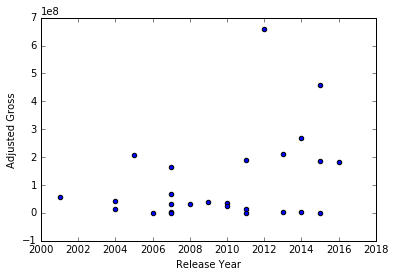

In [14]:
#this looks good! let's test and make sure the data makes sense with a simple plot:

CE.plot.scatter('Release Year', 'Adjusted Gross')

In [67]:
#we love what we see, let's repeat it for our other leading gentlemen

# Chris Hemsworth

“The Heartthrob” 

Age: 32

Height: 6’ 3”

Known for: Thor; The Avengers; Snow White and the Huntsman

Legit Roles: Rush

Biggest Hit: Marvel’s The Avengers $659,640,800

Biggest Thor Movie: $212,276,600


In [88]:
# same process for our second leading Chris
# chris hemsworth
url = 'http://www.boxofficemojo.com/people/chart/?view=Actor&id=chrishemsworth.htm'
hemsworth  = pd.read_html(url)

print('Ouput has type', type(hemsworth), 'and length', len(hemsworth))
print('First element has type', type(hemsworth[0]))

hemsworth[3]

Ouput has type <class 'list'> and length 5
First element has type <class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5
0,Rank,Title (click to view),Studio,Adjusted Gross,Unadjusted Gross,Release
1,1,Marvel's The Avengers,BV,"$659,640,800","$623,357,910",5/4/12
2,2,Avengers: Age of Ultron,BV,"$459,260,900","$459,005,868",5/1/15
3,-,Star Trek,Par.,"$296,422,000","$257,730,019",5/8/09
4,3,Thor: The Dark World,BV,"$212,276,600","$206,362,140",11/8/13
5,4,Thor,Par.,"$192,766,600","$181,030,624",5/6/11
6,5,Snow White and the Huntsman,Uni.,"$164,785,200","$155,332,381",6/1/12
7,6,Vacation,WB (NL),"$61,208,200","$58,884,188",7/29/15
8,7,Red Dawn (2012),FD,"$47,783,500","$44,806,783",11/21/12
9,8,The Cabin in the Woods,LGF,"$44,466,300","$42,073,277",4/13/12


type= <class 'pandas.core.frame.DataFrame'>   length= 16 shape= (16, 6)
       0                            1        2               3  \
0   Rank        Title (click to view)   Studio  Adjusted Gross   
1      1        Marvel's The Avengers       BV    $659,640,800   
2      2      Avengers: Age of Ultron       BV    $459,260,900   
3      -                    Star Trek     Par.    $296,422,000   
4      3         Thor: The Dark World       BV    $212,276,600   
5      4                         Thor     Par.    $192,766,600   
6      5  Snow White and the Huntsman     Uni.    $164,785,200   
7      6                     Vacation  WB (NL)     $61,208,200   
8      7              Red Dawn (2012)       FD     $47,783,500   
9      8       The Cabin in the Woods      LGF     $44,466,300   
10     9   The Huntsman: Winter's War     Uni.     $41,014,500   
11    10                  Rush (2013)     Uni.     $27,707,400   
12    11      In the Heart of the Sea       WB     $24,675,600   
13  

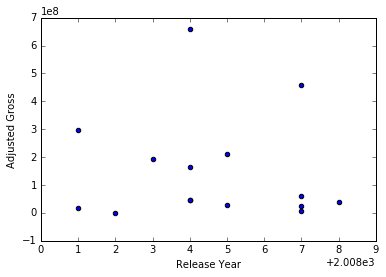

In [87]:
ch=hemsworth[3]

print("type=", type(ch)," ", "length=", len(ch), "shape=", ch.shape)

print(ch)

ch.to_csv("ch.csv")

#since scraped dataset is small, and had a tricky double index, we decided to export to csv and do a quick cleanup there
#Cleaned File saved as CH1.csv

path='C:\\Users\\Nick\\Desktop\\Data_Bootcamp\\Final Project\\CH1.csv'
#again, this is the path on my machine, you'll want to make sure you adjust to wherever you saved down CH1
CH = pd.read_csv(path)

print(type(CH), "shape is", CH.shape, "types:", CH.dtypes)

CH.plot.scatter('Release Year', 'Adjusted Gross')

*Our data looks good! The axes are a little strange, but we just want to make sure we have data we can work with!*

# Chris Pratt

“The Everyman”

Age: 36

Height: 6’ 2”

Known for: Guardians of the Galaxy ($353,303,500); Jurassic World (1 + one in pre); Parks & Rec (TV)

Legit Roles: Her, Moneyball

Biggest Role: Jurassic World $678,242,100

In [ ]:
# Chris number three, coming through!
# chris pratt
url = 'http://www.boxofficemojo.com/people/chart/?view=Actor&id=chrispratt.htm'
pratt  = pd.read_html(url)

print('Ouput has type', type(pratt), 'and length', len(pratt))
print('First element has type', type(pratt[0]))

pratt[3]

type= <class 'pandas.core.frame.DataFrame'>   length= 17 shape= (17, 6)
       0                         1       2               3                 4  \
0   Rank     Title (click to view)  Studio  Adjusted Gross  Unadjusted Gross   
1      1            Jurassic World    Uni.    $678,242,100      $652,270,625   
2      2   Guardians of the Galaxy      BV    $353,303,500      $333,176,600   
3      3            The LEGO Movie      WB    $277,265,000      $257,760,692   
4      -                    Wanted    Uni.    $160,735,800      $134,508,551   
5      -          Zero Dark Thirty    Sony    $103,420,700       $95,720,716   
6      4                 Moneyball    Sony     $82,442,600       $75,605,492   
7      5                Bride Wars     Fox     $70,164,200       $58,715,510   
8      6              Delivery Man      BV     $31,566,000       $30,664,106   
9      7  The Five-Year Engagement    Uni.     $30,469,100       $28,835,528   
10     8                Her (2013)      WB     $

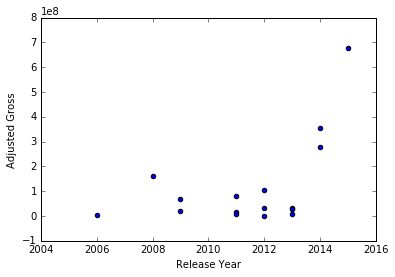

In [90]:
cp=pratt[3]

print("type=", type(cp)," ", "length=", len(cp), "shape=", cp.shape)

print(cp)

cp.to_csv("cp.csv")

#since scraped dataset is small, and had a tricky double index, we decided to export to csv and do a quick cleanup there
#Cleaned File saved as CP1.csv

path='C:\\Users\\Nick\\Desktop\\Data_Bootcamp\\Final Project\\CP1.csv'
#remember to adjust path to where you've saved the .csv down
CP = pd.read_csv(path)

print(type(CP), "shape is", CP.shape, "types:", CP.dtypes)

CP.plot.scatter('Release Year', 'Adjusted Gross')

**Now that we've got that sorted out, let's take a look at all three Chrises together. How do their box office titles stack up with one another over time?**

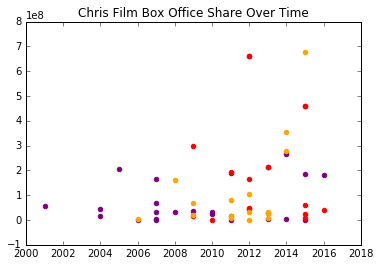

In [80]:
plt.scatter(CE['Release Year'], CE['Adjusted Gross'],
           color="purple")

plt.scatter(CH['Release Year'], CH['Adjusted Gross'],
           color="red")

plt.scatter(CP['Release Year'], CP['Adjusted Gross'],
           color="orange")

plt.title('Chris Film Box Office Share Over Time')

In the graph above, we color coded our Chris contingency as follows:

Chris Evans: Purple

Chris Hemsworth: Red

Chris Pratt: Orange

A few things stand out. First, we can see right away that Chris Evans has, to date, had the longest career at the box office, dating back to 2001. Does this maybe suggest some longevity right off the bat? We're not so quick to draw that conclusion, especially since his biggest box office hit is shared with Chris Hemsworth in the Marvel Avengers movie.

Looking back at our raw data, we can also note that Pratt seems to have had the biggest breakout hit with his 2015 with Jurassic World, one of the top grossing films of all time, where he was the sole leading man.

*This data gives us one view, but what other cuts might we want to look at?*

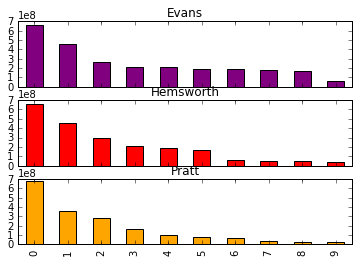

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)

CE['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[0], color='purple', title="Evans")
CH['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[1], color='red', title="Hemsworth")
CP['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[2], color='orange', title="Pratt")

In the above, we take a look at the box office grosses for the top 10 films for each Chris. Here, we start to wonder if maybe Evans has a more consistent box office performance. Of his top 10 filims, 9 are in the $200 million range, a stat unmatched by our other two gentlemen.

*This is an interesting insight, but what does it look like over time?*

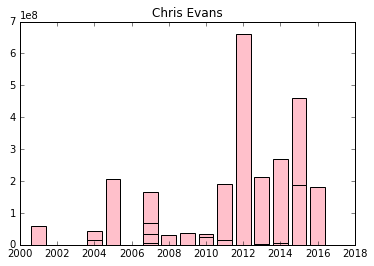

In [89]:
plt.bar(CE['Release Year'], CE['Adjusted Gross'],
       align='center',
       color='pink')
plt.title('Chris Evans')


Buoyed by franchise films in the last five years, Chris Evans has been a steady player, but hasn't excelled outside the Marvel universe franchises. All his biggest hits are as a member of a franchise / ensemble. Evans's Marvel hits since 2011 have performed well, though non-Marvel titles have largely been blips on the radar.

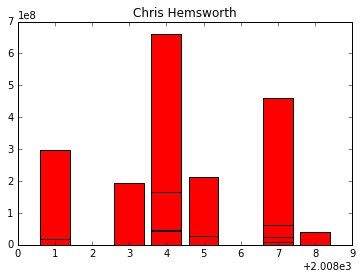

In [85]:
plt.bar(CH['Release Year'], CH['Adjusted Gross'],
       align='center',
       color='red')
plt.title("Chris Hemsworth")

Hemsworth had a *very* rough 2015. He featured prominently in 4 films, only one of which was a box office success (another Marvel Avengers installment). After a breakout 2012, are the tides turning after major flops like In the Heart of the Sea?

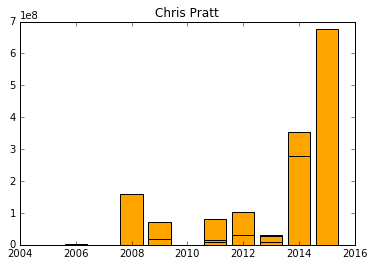

In [86]:
plt.bar(CP['Release Year'], CP['Adjusted Gross'],
       align='center',
       color='orange')
plt.title("Chris Pratt")

Pratt may have been a slower starter than our other leading gentlemen, but his 2014 breakout Guardians of the Galaxy cemented his status as leading man potential, and 2015's Jurassic World broke tons of box office records. As a non-Marvel film (though a franchise reboot), Jurassic World is unique in that it may be a standalone hit for Pratt, and everyone will be closely watching his box office performance in whatever leading man project he chooses next.

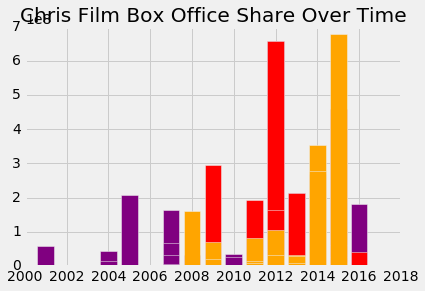

In [120]:
plt.bar(CE['Release Year'], CE['Adjusted Gross'],
       align='center',
       color='purple')

plt.bar(CH['Release Year'], CH['Adjusted Gross'],
       align='center',
       color='red')

plt.bar(CP['Release Year'], CP['Adjusted Gross'],
       align='center',
       color='orange')

plt.title('Chris Film Box Office Share Over Time')



We love this data cut. Here, we take a comparative look of our Chrises over time. Keeping our colors consistent, Evans is purple, Hemsworth is red, Pratt is orange. 

One slight issue; movies where both Hemsworth and Evans were cast (Avengers) -- the graph chooses just one color. Here's a flipped view:

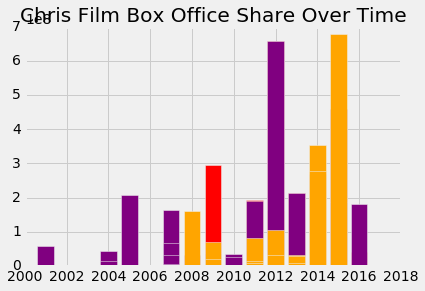

In [121]:
plt.bar(CH['Release Year'], CH['Adjusted Gross'],
       align='center',
       color='red')

plt.bar(CE['Release Year'], CE['Adjusted Gross'],
       align='center',
       color='purple')

plt.bar(CP['Release Year'], CP['Adjusted Gross'],
       align='center',
       color='orange')

plt.title('Chris Film Box Office Share Over Time')

*Whoa! Where did Hemsworth go?*

What these two cuts show us is that Evans and Hemsworth are both heavily reliant on their Marvel franchise hits, where they are sharing the limelight, whereas Pratt has been more of a solo vehicle, especially in more recent years.

# **Scene 3: The "OGs"**
In order to determine which Chris has staying power we pulled data on Hollywood stars of yore (Bruce Willis, Arnold Schwarzenegger, and Tom Cruise) for comparison. Given the volume of data on the older stars, we isolated the top ten grossing films for each hero.

# Bruce Willis

Heyday: The late 80s to the late 90s

Known for: Die Hard franchise

Biggest Movie: The Sixth Sense $494,028,900

Type: Leading Man/Action Hero Hybrid 

In [122]:
#Movie scraping and data arranging like we did before
#Bruce Willis
url = 'http://www.boxofficemojo.com/people/chart/?id=brucewillis.htm'
willis = pd.read_html(url)

print('Ouput has type', type(willis), 'and length', len(willis))
print('First element has type', type(willis[0]))

willis[2]

Ouput has type <class 'list'> and length 4
First element has type <class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5
0,Rank,Title (click to view),Studio,Adjusted Gross,Unadjusted Gross,Release
1,1,The Sixth Sense,BV,"$494,028,900","$293,506,292",8/6/99
2,2,Armageddon,BV,"$368,772,000","$201,578,182",7/1/98
3,3,Look Who's Talking,TriS,"$298,949,000","$140,088,813",10/13/89
4,4,Die Hard 2: Die Harder,Fox,"$238,416,400","$117,540,947",7/6/90
5,5,Pulp Fiction,Mira.,"$217,817,900","$107,928,762",10/14/94
6,6,Over the Hedge,P/DW,"$203,063,500","$155,019,340",5/19/06
7,7,Die Hard: With A Vengeance,Fox,"$197,266,000","$100,012,499",5/19/95
8,8,Die Hard,Fox,"$173,288,500","$83,008,852",7/15/88
9,-,Ocean's Twelve,WB,"$172,251,500","$125,544,280",12/10/04


In [123]:
bruce=willis[2]

bruce.to_csv("Bruce.csv") #Converting dataframe into a csv file
#editing and cleaning as needed, resaved as Bruce1.csv

In [124]:
path='/Users/Nick/Desktop/data_bootcamp/Final Project/Bruce1.csv' 
BWillis = pd.read_csv(path)

print(type(BWillis), BWillis.shape, BWillis.dtypes)

<class 'pandas.core.frame.DataFrame'> (68, 6) Rank                object
Title               object
Studio              object
Adjusted Gross       int64
Unadjusted Gross     int64
Release Year         int64
dtype: object


In [126]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

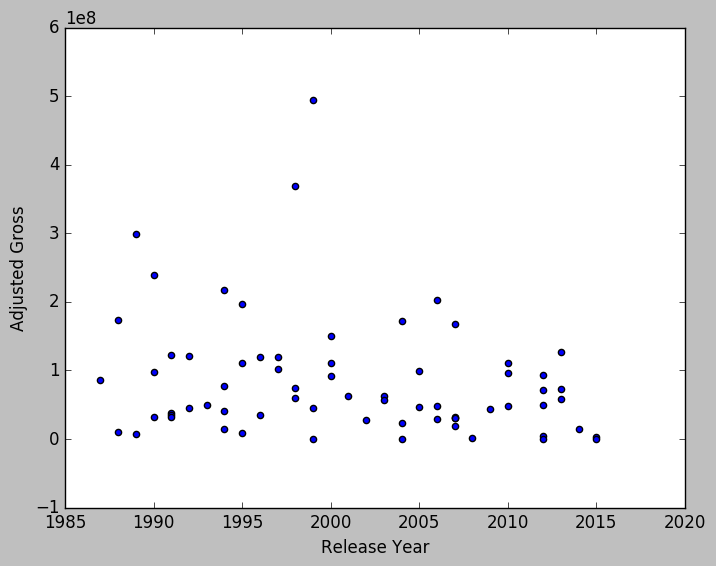

In [127]:
BWillis.plot.scatter('Release Year', 'Adjusted Gross')

In [129]:
#That's a lot of films! Let's narrow:

BW=BWillis.head(11)

print(BW)

   Rank                      Title  Studio  Adjusted Gross  Unadjusted Gross  \
0     1             The Sixth Sense     BV       494028900         293506292   
1     2                  Armageddon     BV       368772000         201578182   
2     3          Look Who's Talking   TriS       298949000         140088813   
3     4      Die Hard 2: Die Harder    Fox       238416400         117540947   
4     5                Pulp Fiction  Mira.       217817900         107928762   
5     6              Over the Hedge   P/DW       203063500         155019340   
6     7  Die Hard: With A Vengeance    Fox       197266000         100012499   
7     8                    Die Hard    Fox       173288500          83008852   
8     -              Ocean's Twelve     WB       172251500         125544280   
9     9       Live Free or Die Hard    Fox       167770700         134529403   
10   10                 Unbreakable     BV       150706100          95011339   

    Release Year  
0           1999  
1

In [131]:
#we'll come back to this later, but let's get our other leading men in the frame!

# **Arnold Schwarzenegger**

Heyday: Mid 80s to the mid 90s

Known for: the Terminator franchise

Biggest Movie: Terminator 2: Judgement Day $417,471,700

Type: Beefcake w/comedic chops  

In [132]:
#here we go again!

#Arnold Schwarzenegger

url = 'http://www.boxofficemojo.com/people/chart/?id=arnoldschwarzenegger.htm'
schwarz = pd.read_html(url)

print('Ouput has type', type(schwarz), 'and length', len(schwarz))
print('First element has type', type(schwarz[0]))

schwarz[2]

Ouput has type <class 'list'> and length 4
First element has type <class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5
0,Rank,Title (click to view),Studio,Adjusted Gross,Unadjusted Gross,Release
1,1,Terminator 2: Judgment Day,TriS,"$417,471,700","$204,843,345",7/3/91
2,2,True Lies,Fox,"$300,263,900","$146,282,411",7/15/94
3,3,Total Recall,Sony,"$242,195,900","$119,412,921",6/1/90
4,4,Twins,Uni.,"$238,720,100","$111,938,388",12/9/88
5,5,Terminator 3: Rise of the Machines,WB,"$213,960,900","$150,371,112",7/2/03
6,6,Batman and Robin,WB,"$200,620,900","$107,325,195",6/20/97
7,7,Eraser,WB,"$196,632,600","$101,295,562",6/21/96
8,8,Kindergarten Cop,Uni.,"$186,235,700","$91,457,688",12/22/90
9,-,Terminator Salvation,WB,"$144,137,700","$125,322,469",5/21/09


In [133]:
arnold=schwarz[2]
print("type=", type(arnold)," ", "length=", len(arnold))

arnold.shape

print(arnold)

type= <class 'pandas.core.frame.DataFrame'>   length= 34
       0                                   1       2               3  \
0   Rank               Title (click to view)  Studio  Adjusted Gross   
1      1          Terminator 2: Judgment Day    TriS    $417,471,700   
2      2                           True Lies     Fox    $300,263,900   
3      3                        Total Recall    Sony    $242,195,900   
4      4                               Twins    Uni.    $238,720,100   
5      5  Terminator 3: Rise of the Machines      WB    $213,960,900   
6      6                    Batman and Robin      WB    $200,620,900   
7      7                              Eraser      WB    $196,632,600   
8      8                    Kindergarten Cop    Uni.    $186,235,700   
9      -                Terminator Salvation      WB    $144,137,700   
10     9                            Predator     Fox    $131,082,100   
11    10                  Jingle All the Way     Fox    $116,877,400   
12    1

In [134]:
arnold.to_csv("Arnold.csv")

In [135]:
path='/Users/Nick/Desktop/data_bootcamp/Final Project/Arnold1.csv' 
ASchwarz = pd.read_csv(path)

print(type(ASchwarz), ASchwarz.shape, ASchwarz.dtypes)

print(ASchwarz)

<class 'pandas.core.frame.DataFrame'> (33, 6) Rank                object
Title               object
Studio              object
Adjusted Gross       int64
Unadjusted Gross     int64
Release Year         int64
dtype: object
   Rank                              Title  Studio  Adjusted Gross  \
0     1          Terminator 2: Judgment Day   TriS       417471700   
1     2                           True Lies    Fox       300263900   
2     3                        Total Recall   Sony       242195900   
3     4                               Twins   Uni.       238720100   
4     5  Terminator 3: Rise of the Machines     WB       213960900   
5     6                    Batman and Robin     WB       200620900   
6     7                              Eraser     WB       196632600   
7     8                    Kindergarten Cop   Uni.       186235700   
8     -                Terminator Salvation     WB       144137700   
9     9                            Predator    Fox       131082100   
10   10 

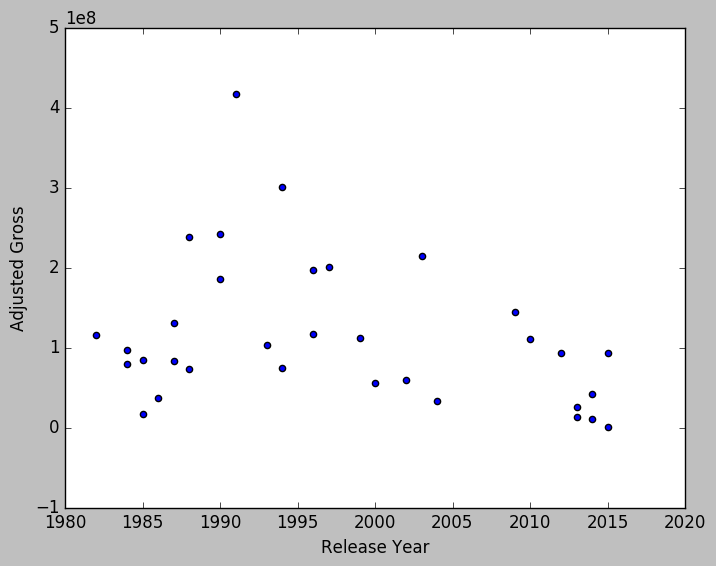

In [136]:
ASchwarz.plot.scatter('Release Year', 'Adjusted Gross')

In [137]:
#let's scale back sample size again

AS=ASchwarz.head(11)

#we'll use this soon

# **Tom Cruise**

Heyday: Mid 80’s - early aughts

Known for: Mission Impossible franchise

Biggest Movie: Top Gun $$412,055,200

Type: Cocky leading man 

In [138]:
#last but not least, our data for Tom Cruise

url = 'http://www.boxofficemojo.com/people/chart/?id=tomcruise.htm'
cruise = pd.read_html(url)

print('Ouput has type', type(cruise), 'and length', len(cruise))
print('First element has type', type(cruise[0]))

cruise[3]

Tom=cruise[3]

Tom.to_csv("Tom.csv")

Ouput has type <class 'list'> and length 5
First element has type <class 'pandas.core.frame.DataFrame'>


In [139]:
path='/Users/Nick/Desktop/data_bootcamp/Final Project/Tom1.csv' 
TCruise = pd.read_csv(path)

print(type(TCruise), TCruise.shape, TCruise.dtypes)

print(TCruise)

<class 'pandas.core.frame.DataFrame'> (40, 6) Rank                object
Title               object
Studio              object
Adjusted Gross       int64
Unadjusted Gross     int64
Release Year         int64
dtype: object
   Rank                                 Title   Studio  Adjusted Gross  \
0     1                               Top Gun     Par.       412055200   
1     2                              Rain Man      MGM       371442800   
2     3                   Mission: Impossible     Par.       351317700   
3     4                Mission: Impossible II     Par.       342897400   
4     5                              The Firm     Par.       328171200   
5     -           Austin Powers in Goldmember       NL       315005500   
6     6                     War of the Worlds     Par.       313592100   
7     7                        A Few Good Men     Col.       292607100   
8     8                         Jerry Maguire     Sony       291111400   
9     9  Mission: Impossible - Ghost P

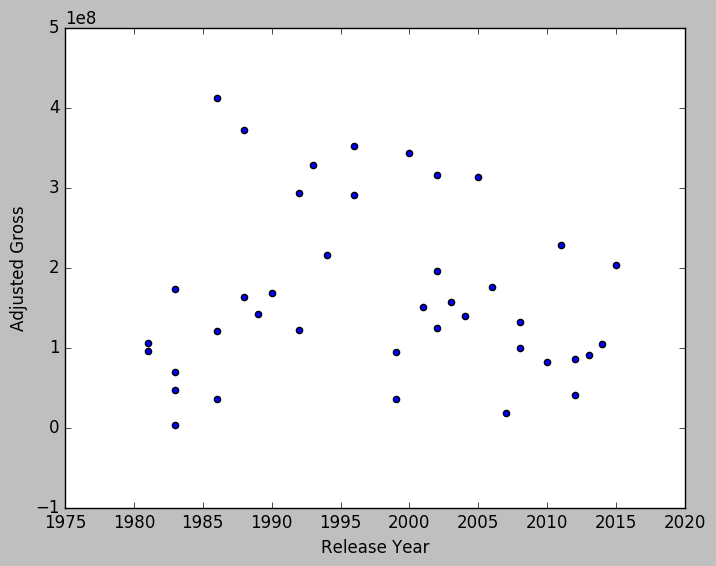

In [140]:
TCruise.plot.scatter('Release Year', 'Adjusted Gross')

In [141]:
#cutting down to the top 10

TC=TCruise.head(11)

# Scene 4: "The Final Showdown"

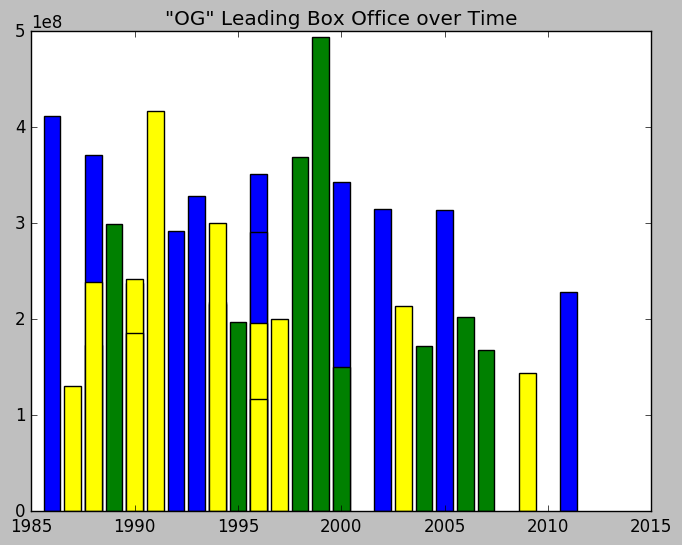

In [143]:
#All of the old school action stars in one histogram. Representing share of box office cumulatively over time.
plt.bar(TC['Release Year'], 
        TC['Adjusted Gross'],
      align='center',
      color='Blue')

plt.bar(BW['Release Year'], 
        BW['Adjusted Gross'],
      align='center',
      color='Green')

plt.bar(AS['Release Year'], 
        AS['Adjusted Gross'],
      align='center',
      color='Yellow')

plt.title('"OG" Leading Box Office over Time')

  LEGEND:
  
  Tom Cruise = Blue

  Bruce Willis = Green
  
  Arnold Schwarzenegger = Yellow

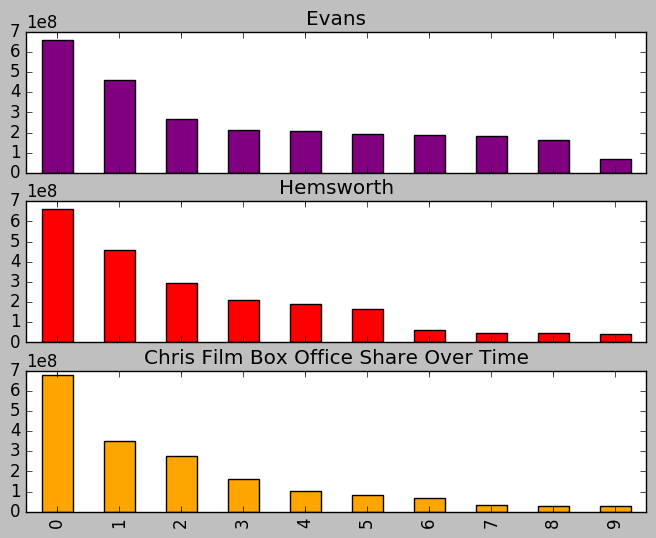

In [145]:
#As a reminder, here's what we are comparing against:

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)

CE['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[0], color='purple', title="Evans")
CH['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[1], color='red', title="Hemsworth")
CP['Adjusted Gross'].head(10).plot(kind="bar",ax=ax[2], color='orange', title="Pratt")

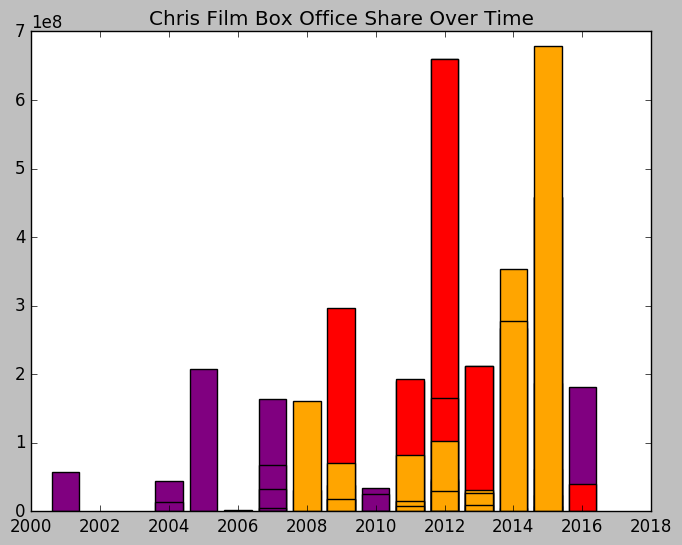

In [146]:
plt.bar(CE['Release Year'], CE['Adjusted Gross'],
       align='center',
       color='purple')

plt.bar(CH['Release Year'], CH['Adjusted Gross'],
       align='center',
       color='red')

plt.bar(CP['Release Year'], CP['Adjusted Gross'],
       align='center',
       color='orange')

plt.title('Chris Film Box Office Share Over Time')

  LEGEND:
  
  Chris Evans = Purple

  Chris Hemsworth = Red
  
  Chris Pratt = Orange

# **Our Findings**

Tom Cruise (blue) has obvious staying power with films raking in over 200 million over two decades. Arnold's biggest films are clustered in a 10 year period. Bruce Willis also had clusters of hits with his biggest successes in the late nineties. If our Chrises want to stay relevant in 2035 they'll need to adopt the "slow and steady wins the race" strategy of Tom Cruise (as long as slow and steady comes with strong receipts). 

# The Verdict!

The Winner: Chris Pratt! Looking at the data we predict that Chris Pratt is in the best position to capitalize going forward given his strong hauls in solo vehicles over the past several years. If he can keep his popularity up over the next decade he will be the Chris you take your grandkids to the movies to see. The upward trajectory matches our legends, and we like the trend that we see coupled with soft factors like his "everyman" appeal.

Dark Horse: Chris Evans if he can successfully spin his Marvel success into a solo vehicle for leading roles that aren't franchises.

Throw him a lifesaver: Chris Hemsworth. The once bright Thor star is floundering in solo projects, and may go the downward route of Bruce Willis.

# *The End*